<a href="https://colab.research.google.com/github/kmartyn30/Neural_Network_Charity_Analysis/blob/main/Del3_4_AlphabetSoupCharityh5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 1: Preprocessing the Data for a Neural Network

In [ ]:
# Import our dependencies
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving charity_data.csv to charity_data (1).csv


In [ ]:
#  Import and read the charity_data.csv.
#import pandas as pd
#import io
#df=pd.read_csv(io.bytesIO(uploaded['Resources/charity_data.csv'])


In [ ]:
application_df = pd.read_csv("charity_data.csv")
application_df.head(10)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts= application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

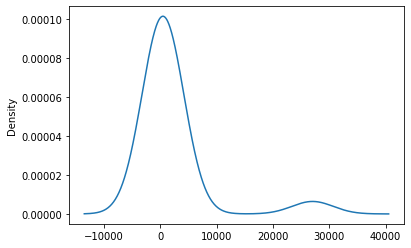

In [ ]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [ ]:
# Determine which values to replace if counts are less than ...?
replace_application_type_counts= list(application_type_counts[application_type_counts < 500].index)
replace_application_type_counts

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [ ]:
# Replace in dataframe
for app in replace_application_type_counts:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")

In [ ]:
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

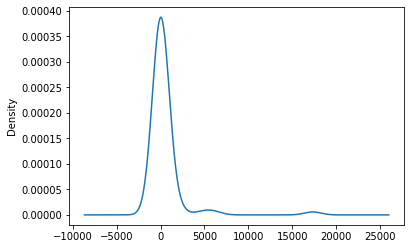

In [ ]:
# Visualize the value counts of CLASSIFICATION
classification_value_counts.plot.density() 

In [ ]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value_counts[classification_value_counts < 500].index)
replace_class

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [ ]:
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [ ]:
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
#y = application_df["IS_SUCCESSFUL"].values
#X = application_df.drop(["IS_SUCCESSFUL"],1).values

y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values


<ipython-input-86-053e184aca99>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features =len(X_train[0])

hidden_nodes_layer1 = 10

hidden_nodes_layer2 = 9

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
  tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                450       
                                                                 
 dense_52 (Dense)            (None, 9)                 99        
                                                                 
 dense_53 (Dense)            (None, 1)                 10        
                                                                 
Total params: 559
Trainable params: 559
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
#cp_callback = ModelCheckpoint(
   # filepath=checkpoint_path,
   # verbose=1,
    #save_weights_only=True,
   # save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=70)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/70
804/804 [==============================] - 3s 3ms/step - loss: 0.6052 - accuracy: 0.6828
Epoch 2/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5613 - accuracy: 0.7228
Epoch 3/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7272
Epoch 4/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7289
Epoch 5/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7288
Epoch 6/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7306
Epoch 7/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7322
Epoch 8/70
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7320
Epoch 9/70
804/804 [==============================] - 3s 4ms/step - loss: 0.5477 - accuracy: 0.7330
Epoch 10/70
804/804 [==============================] - 5s 6ms/step - loss: 0.5471 - accuracy: 0.7334

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5508 - accuracy: 0.7290 - 396ms/epoch - 1ms/step
Loss: 0.5507892370223999, Accuracy: 0.7289795875549316


In [ ]:
 #Deliverable #3
 
 #Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features =len(X_train[0])

hidden_nodes_layer1 = 90

hidden_nodes_layer2 = 75

hidden_nodes_layer3 = 50

hidden_nodes_layer4 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
  tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="relu"))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

#Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 90)                4050      
                                                                 
 dense_55 (Dense)            (None, 75)                6825      
                                                                 
 dense_56 (Dense)            (None, 50)                3800      
                                                                 
 dense_57 (Dense)            (None, 25)                1275      
                                                                 
 dense_58 (Dense)            (None, 1)                 26        
                                                                 
Total params: 15,976
Trainable params: 15,976
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
#cp_callback = ModelCheckpoint(
   # filepath=checkpoint_path,
   # verbose=1,
    #save_weights_only=True,
   # save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.7216
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5541 - accuracy: 0.7292
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5514 - accuracy: 0.7301
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5489 - accuracy: 0.7316
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5479 - accuracy: 0.7329
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5468 - accuracy: 0.7327
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5460 - accuracy: 0.7335
Epoch 8/50
804/804 [==============================] - 5s 6ms/step - loss: 0.5453 - accuracy: 0.7346
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5450 - accuracy: 0.7340
Epoch 10/50
804/804 [==============================] - 4s 5ms/step - loss: 0.5442 - accuracy: 0.7343

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7301 - 428ms/epoch - 2ms/step
Loss: 0.5543216466903687, Accuracy: 0.7301457524299622


In [ ]:
#exportmodel to HDF5 file 
nn.save("AlphabetSoupCharity.Optimization.h5")

NameError: ignored